# DSCI 100 Group Project Proposal - Classifying Pulsar Star Data
### Group 168: 
    Anjali Dajee
    Ross Tomita
    Yuwen Luo

# 1. Introduction

  Our project seeks to explore the Pulsar Star Dataset, which describes samples of collected pulsar star candidates. A pulsar star is a type of neutron star that forms when a star collapses within itself and eventually explodes, creating a supernova. As the pulsars rotate, they produce a broadband radio emission that can be detected from earth.  Since each pulsar’s emission is slightly different during each rotation,  a singular signal detection is made by averaging several rotation emissions of the star (Lyon et al.)  However, most detections are actually interfering radio signals, and not actual pulsars. Thus we are interested in classifying if the detection is a truly pulsar or not.
  
  The Pulsar Star dataset has 9 different attributes that used to classify whether a detection is a pulsar star or not. **Using this dataset, we will try to answer the question: Can the variables accurately predict whether an emission is a pulsar star or not?**
  
  <blockquote>
The dataset contains 8 quantitative variables: 
    
- four variables are simple statistics (mean, standard deviation, kurtosis, and skewness) from integrated pulse profile, which are pre-processed data used to describe signals detected; 
- other four variables are the same simple statistics from the DM-SNR curve (Dispersion Measure and Signal to Noise Ratio curve) which shows relation between Dispersion Measurement and Signal to Noise Ratio and is considered as an important sign to determine pulsar star. 
  
The dataset also has 1 categorical variable with 2 different levels: 

- 0 represents negative examples (false detections for pulsar starts);
  
- 1 represents positive examples (true detections for pulsar starts).
  </blockquote>
      
We have also taken into consideration that the number of true pulsar stars is a minority positive class, while the number of false detections is a majority negative class. This information will be useful when sampling the training set. Based on the preliminary data analysis, we selected 5 continuous variables with the strongest relationship to the class variable and we plan to use these variables to determine if they can accurately classify emissions as pulsar/non-pulsar. 

# 2. Preliminary exploratory data analysis

## 2.1 Import data from the web

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr) 
library(tidymodels)
install.packages("corrplot")
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [22]:
# import data
#temp  <- tempfile()
#download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip",temp)
pulsar <- read.csv("https://raw.githubusercontent.com/RowanYuwenLUO/dsci100_2022w1_group168/main/HTRU_2.csv",
                   header = FALSE, 
                   col.names = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness",
                                 "Class"))
# view the pulsar dataset
head(pulsar)

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
2,102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
3,103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
4,136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
5,88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
6,93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


## 2.2 Tidy the dataset and show some statistics

In [3]:
# dimension of the data set
dim(pulsar) 

# summary statistics for all 8 predictors
summary_table <- data.frame(cbind(summary(pulsar$integr.mean), summary(pulsar$integr.std),
                                  summary(pulsar$integr.kurtosis), summary(pulsar$integr.skewness),
                                  summary(pulsar$DMSNR.mean), summary(pulsar$DMSNR.std), 
                                  summary(pulsar$DMSNR.kurtosis), summary(pulsar$DMSNR.skewness))) 
colnames(summary_table) <- c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness")
summary_table

[1] 17898     9

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,5.8125,24.77204,-1.87601118,-1.7918860,0.2132107,7.370432,-3.139270,-1.976976
1st Qu.,100.9297,42.37602,0.02709812,-0.1885717,1.9230769,14.437332,5.781506,34.960504
Median,115.0781,46.94748,0.22324002,0.1987104,2.8018395,18.461316,8.433515,83.064556
Mean,111.0800,46.54953,0.47785726,1.7702790,12.6143997,26.326515,8.303556,104.857709
3rd Qu.,127.0859,51.02320,0.47332518,0.9277831,5.4642559,28.428104,10.702959,139.309330
Max.,192.6172,98.77891,8.06952205,68.1016217,223.3921405,110.642211,34.539844,1191.000837


In [4]:
# check the missing data
sum(is.na(pulsar))

[1] 0

In [5]:
# show number of observations in each class
count_data <- pulsar %>% 
    group_by(Class) %>% 
    summarise(n=n()) %>%
    mutate(freq = n / nrow(pulsar))
count_data 

Class,n,freq
<int>,<int>,<dbl>
0,16259,0.90842552
1,1639,0.09157448


#### Summary for the original Pulsar Dataset:
<blockquote>
    
* 17898 observations (rows)
* 9 variables (columns): 1 categorical and 8 continuous variables
* no missing data 

- `0 is the negative examples`
- `1 is the positive examples`
- majority of the data (around 90%) are in class 0
</blockquote>

## 2.3 Split the data into training and testing sets

In [6]:
set.seed(123)
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = Class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

In [7]:
# dimension of the training data set 
dim(pulsar_train) 

[1] 13423     9

In [8]:
# number of observations in each class
count_train <- pulsar_train %>% 
    group_by(Class) %>% 
    summarise(n=n()) %>%
    mutate(freq = n / nrow(pulsar_train))
count_train

Class,n,freq
<int>,<int>,<dbl>
0,12170,0.90665276
1,1253,0.09334724


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



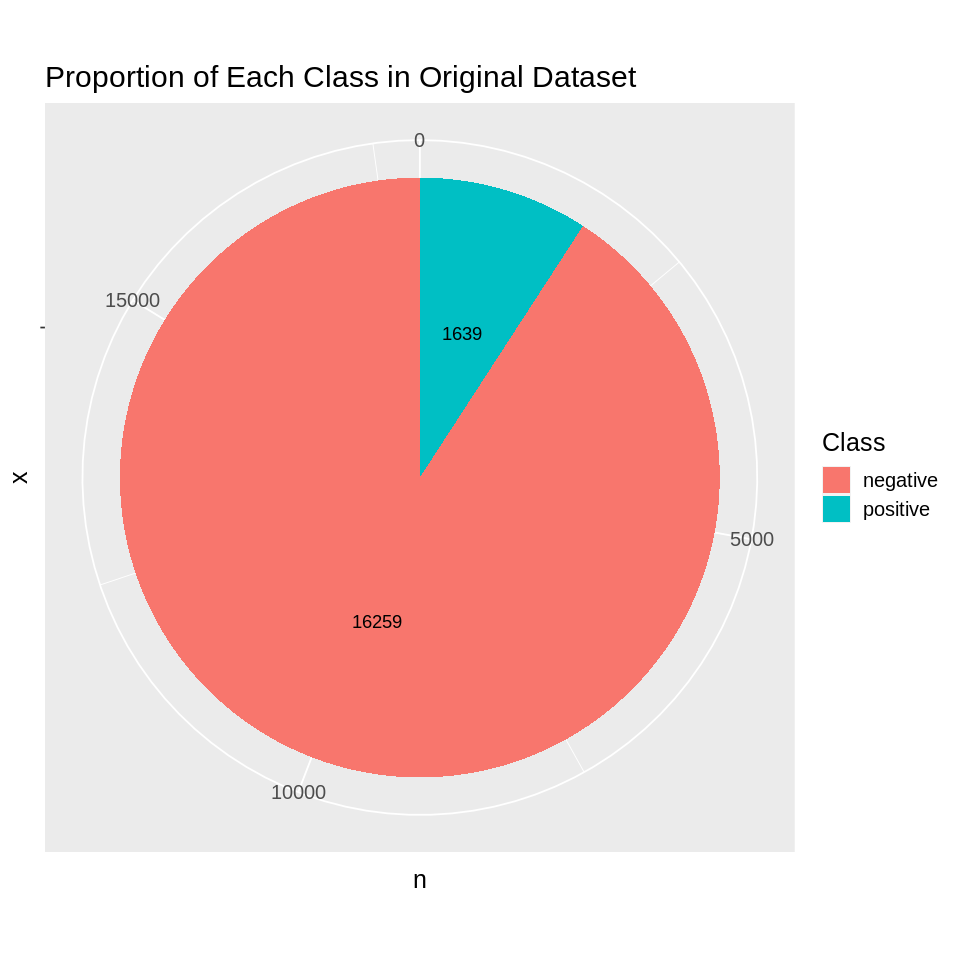

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8) 

ggplot(count_data, aes(x = "", y = n, fill = as.factor(Class))) +
  geom_bar(stat = "identity") + 
  geom_text(aes(label = n), position = position_stack(vjust = 0.5)) + 
  coord_polar(theta = "y", start = 0) + 
  scale_fill_brewer(palette = 'Pastel1') + 
  scale_fill_discrete(labels = c("negative", "positive")) + 
  ggtitle("Proportion of Each Class in Original Dataset") + 
  labs(fill = "Class") + 
  theme(text = element_text(size=15)) 

#### The training data set shows almost the same proportion as the original dataset: about 90% of observations are negative examples and only 10% are positive examples

## 2.3.1 Sample down the `0 (negative) class` in the training set: to deal with the imbalancing probelm.
 - let the number class 0 = the number of class 1

In [10]:
# sample down the class 0 in training set 
set.seed(123)
train_c1 <- filter(pulsar_train, Class == 1)
train_c0 <- filter(pulsar_train, Class == 0)

sample_down_train <- pulsar_train %>% 
  filter(Class ==0) %>%
  sample_n(nrow(train_c1)) %>%
  rbind(train_c1)

In [11]:
# dimension for the training data after sampling down
dim(sample_down_train)

[1] 2506    9

In [12]:
# number of observations in each class after sampling down
count_train2 <- sample_down_train %>% 
    group_by(Class) %>% 
    summarise(n=n()) %>%
    mutate(freq = n / nrow(sample_down_train))
count_train2

Class,n,freq
<int>,<int>,<dbl>
0,1253,0.5
1,1253,0.5


 **The proportion for the two classes are the same, equals to 0.5; and in the training set we have total 2506 observations.**

## 2.4 Analysing the training data set

In [13]:
# calculate the means of the predictor variables
predictors_mean <- sample_down_train %>% 
  select(-Class) %>% 
  colMeans() %>%
  data.frame()
colnames(predictors_mean) <- "mean"
predictors_mean

,mean
,<dbl>
integr.mean,86.256958
integr.std,42.861345
integr.kurtosis,1.700721
integr.skewness,8.177292
DMSNR.mean,29.887667
DMSNR.std,40.028187
DMSNR.kurtosis,5.824315
DMSNR.skewness,67.323829


#### Find large differences between the means of these predictors:
**the largest one is about 86, while the smallest one is only 1.7**

## 2.4.1 Scale the training set

In [16]:
all_predictors_name <- colnames(sample_down_train[, 1:8])
# scale the training set
scaled_train <- sample_down_train %>% 
  mutate_at(all_predictors_name, ~(scale(.) %>% as.vector))
# view the training set
head(scaled_train)

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.9530132,1.8106637,-0.8168831,-0.7010886,-0.6561685,-1.0755796,0.89087155,0.7126506,0
2,1.0886967,3.6593985,-0.8675785,-0.7536754,1.5101584,1.5944108,-1.15877415,-0.6803251,0
3,1.3450323,0.5883488,-1.0096455,-0.6209852,-0.6637171,-1.0960985,1.17488947,1.0446210,0
4,0.7439764,1.0821099,-0.6363887,-0.6296116,-0.3042426,0.5808810,-0.59015834,-0.5998106,0
5,0.8339644,-0.0828916,-0.6085113,-0.5989493,-0.5693893,-0.3795561,-0.00139643,-0.3265444,0
6,-0.1064005,-0.6559463,-0.4430658,-0.4385813,-0.6034269,-0.5059058,0.22646530,-0.1780283,0


In [17]:
scaled_predictors_mean <- scaled_train %>% 
  select(-Class) %>% 
  colMeans() %>%
  data.frame()
colnames(scaled_predictors_mean) <- "mean"
scaled_predictors_mean

,mean
,<dbl>
integr.mean,1.686572e-16
integr.std,3.168992e-16
integr.kurtosis,1.484137e-17
integr.skewness,-3.649426e-17
DMSNR.mean,-1.664808e-17
DMSNR.std,-1.331459e-16
DMSNR.kurtosis,5.974620e-17
DMSNR.skewness,-7.091184e-18


**After scaling the predictos in thetraining set, every predictor has mean around 0.**

## 2.4.2 Visualization for the training set

In [18]:
pivot_train <- scaled_train %>%
  pivot_longer(cols = integr.mean:DMSNR.skewness,
               names_to = "predictor", 
               values_to = "value")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



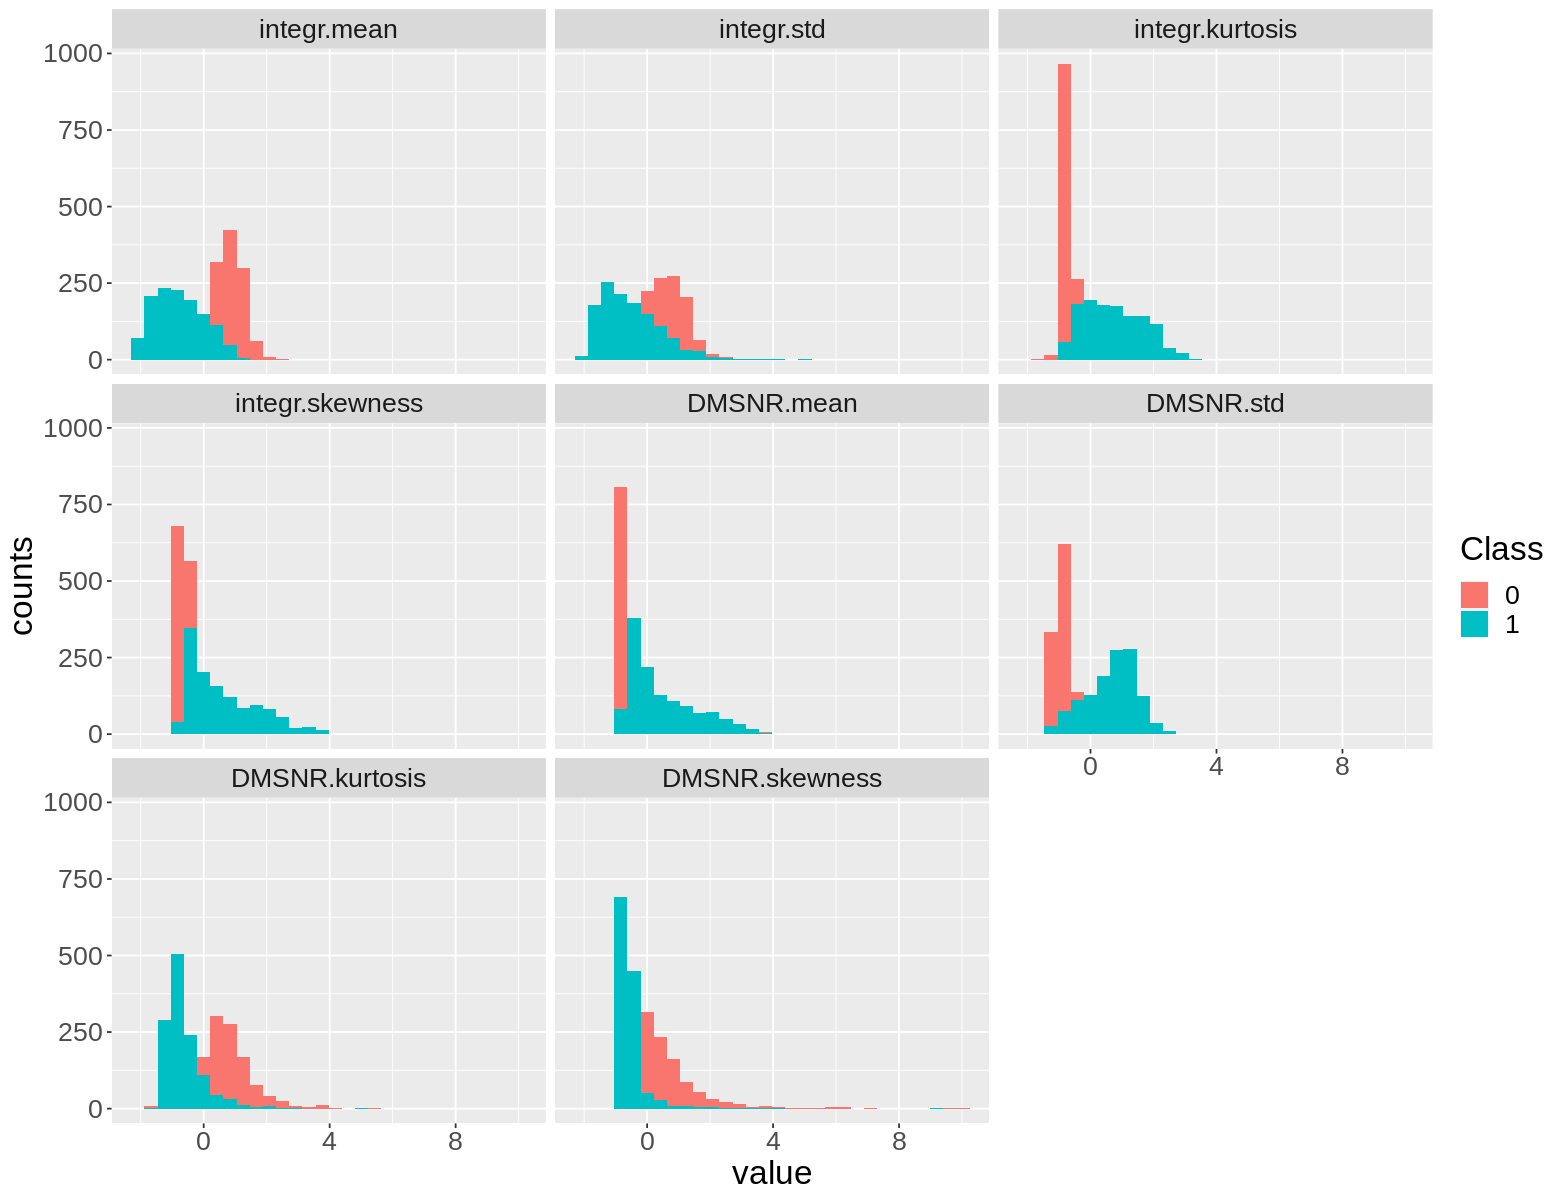

In [19]:
# histogram for all 8 variables
options(repr.plot.width = 13, repr.plot.height = 10) 

pivot_train %>% 
  ggplot(aes(x = value, fill = as.factor(Class))) + 
  geom_histogram(position = "identity") + 
  facet_wrap(~ factor(predictor, 
                      levels = c("integr.mean", "integr.std", "integr.kurtosis", "integr.skewness",
                                 "DMSNR.mean", "DMSNR.std", "DMSNR.kurtosis", "DMSNR.skewness"))) +
  xlab("value") + 
  ylab("counts") + 
  labs(fill = "Class") +
  theme(text = element_text(size=20)) 

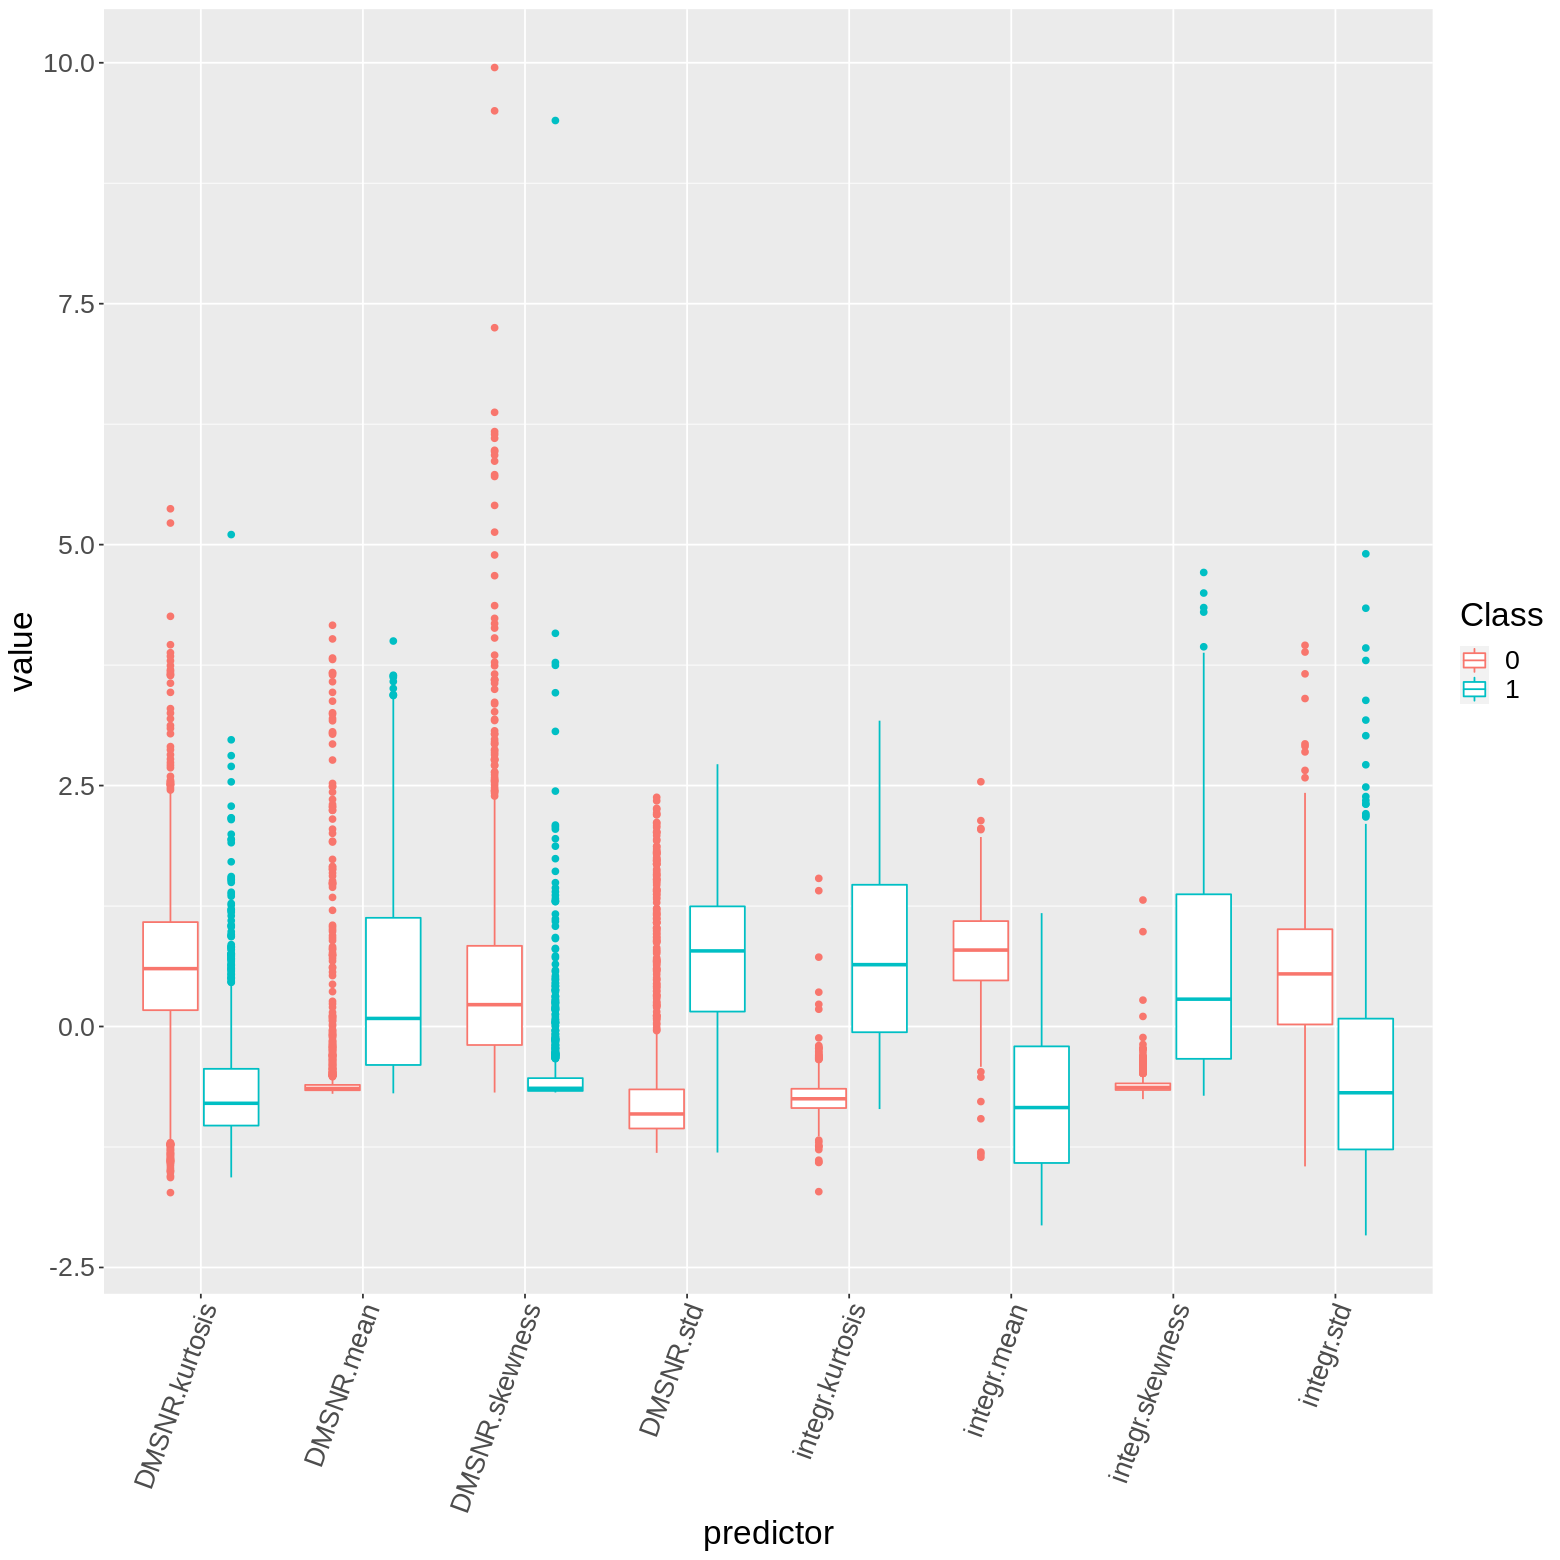

In [20]:
# boxplot
options(repr.plot.width = 13, repr.plot.height = 13) 

ggplot(pivot_train, aes(x=predictor, y=value, color = as.factor(Class))) + 
  geom_boxplot() + 
  labs(color = "Class") +
  theme(axis.text.x = element_text(angle = 70, hjust = 1),
        text = element_text(size=20)) 

##### Both histogram and Boxplot are used to explore the relationship between continuous variables and the categorical variable, and show the differences between the each category class:

- `integr.mean`, `integr.std`, `DMSNR.kurtosis`, `DMSNR.skewness` predictors has larger mean in Class 0;
- `integr.kurtosis`, `integr.skewness`, `DMSNR.std`, `DMSNR.mean` predictors has larger mean in Class 1;

-  data from `DMSNR.skewness` in Class 0 has the most spread distribution;
-  all predictors have a lot of `outliers` shown from the boxplot;
-  almost all predictors in both classes show `skewed to right` distribution, except the `DMSNR.std` variable.

## 2.5 Choose predictors

**In the dataset, the Categorical variable Class `Class` has been tranformed into a `dummy variable`: has values equal to either `0 or 1`. 
Thus we try to get the correlation between each variables to help choose predictors.**

In [21]:
corr.mat <- cor(scaled_train)
corr.mat
corr.mat[ , ncol(corr.mat), drop = FALSE] 

,integr.mean,integr.std,integr.kurtosis,integr.skewness,DMSNR.mean,DMSNR.std,DMSNR.kurtosis,DMSNR.skewness,Class
integr.mean,1.0000000,0.6872586,-0.9422078,-0.8437732,-0.5669821,-0.6332698,0.6017493,0.4353288,-0.7750963
integr.std,0.6872586,1.0000000,-0.7253721,-0.7359978,-0.2027974,-0.3349863,0.3179430,0.2526690,-0.5205059
integr.kurtosis,-0.9422078,-0.7253721,1.0000000,0.9632965,0.5881824,0.6483486,-0.6119384,-0.4403267,0.7349228
integr.skewness,-0.8437732,-0.7359978,0.9632965,1.0000000,0.5384755,0.5636006,-0.5311853,-0.3762123,0.6084140
DMSNR.mean,-0.5669821,-0.2027974,0.5881824,0.5384755,1.0000000,0.7846939,-0.6949288,-0.4344707,0.4673093
DMSNR.std,-0.6332698,-0.3349863,0.6483486,0.5636006,0.7846939,1.0000000,-0.8769701,-0.6560657,0.6662586
DMSNR.kurtosis,0.6017493,0.3179430,-0.6119384,-0.5311853,-0.6949288,-0.8769701,1.0000000,0.9151934,-0.6282438
DMSNR.skewness,0.4353288,0.2526690,-0.4403267,-0.3762123,-0.4344707,-0.6560657,0.9151934,1.0000000,-0.4900915
Class,-0.7750963,-0.5205059,0.7349228,0.6084140,0.4673093,0.6662586,-0.6282438,-0.4900915,1.0000000


,Class
integr.mean,-0.7750963
integr.std,-0.5205059
integr.kurtosis,0.7349228
integr.skewness,0.6084140
DMSNR.mean,0.4673093
DMSNR.std,0.6662586
DMSNR.kurtosis,-0.6282438
DMSNR.skewness,-0.4900915
Class,1.0000000


  <blockqoute>
By looking at the last column of the correlation matrix, we found 
    
`integr.mean`, `integr.kurtosis` are the most correlated predictors to `Class`, the absolute value of their correlation with `Class` are the largest;
    
and then are the `DMSNR.std`, `DMSNR.kurtosis`, `integr.skewness` predictors.
  </blockqoute>
  
  
**Thus, in the classification analysis with k-nn method, we will use the 5 predictors:
`integr.mean`, `integr.kurtosis`, `DMSNR.std`, `DMSNR.kurtosis`, `integr.skewness`**

# 3. Methods

We will be classifying the data using a k-nn classification model. 

We will use  the five predictors: (1)Mean, (2)Excess Kurtosis, (3)Skewness of the integrated profile and (4)Standard Deviation, (5)Excess Kurtosis of the DM-SNR curve in our classification since they have the highest correlation to the response variable.

During analysis, we will use cross-validation on our scaled training set and try to find the parameter K that has the highest accuracy. Then we will use the “best parameter” we find to fit the model and do predictions on our testing set. 

Our results will be visualized using some type of graphical representation; either a scatterplot or line plot.

# 4. Expected outcomes and significance

We expect that using our model with the chosen predictors, we will be able to accurately classify data as either being a pulsar star or not. If this model is successful, it could streamline the process of analyzing whether detections are truly pulsar stars with fewer predictors and without needing to be checked by humans. Further exploration can be done to attempt to answer inferential questions about the data, such as whether there are patterns and trends that can be used to classify the data more accurately. 

# WORKS CITED

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate 
Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1.
